### Importing the libraries

In [1]:
#importing Libraries for the project
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Reading the data

In [2]:
#Reading the file
data = pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Dropped the unnecessary column in the dataset which is not required for neural networks
data.drop('customerID',axis='columns',inplace=True)

In [4]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

### Feature Engineering

In [6]:
# Changing the type to numeric and finding the values values in the totalcharges column
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# Dropping the null values in the data
data= data.dropna()

In [8]:
# We can observe that the 'totalcharges' columns consists of ' ' values.
d1 = data[data.TotalCharges!=' ']

In [9]:
#Converting the data into numeric
d1.TotalCharges = pd.to_numeric(d1.TotalCharges)

C:\Users\saich\AppData\Local\Temp\ipykernel_21104\2937116070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.TotalCharges = pd.to_numeric(d1.TotalCharges)


In [10]:
# Below code prints the rows with customers of 'No' churn
d1[d1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


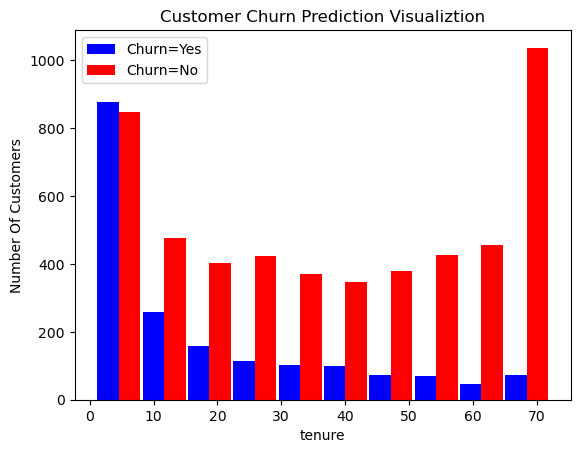

In [11]:
#Visualizations for 'No' and 'Yes' customer churn

t_churn_no = d1[d1.Churn=='No'].tenure
t_churn_yes = d1[d1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([t_churn_yes, t_churn_no], rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

We can observe that more the tenure(customers staying for long time) are leaving the service than the customers who are very new taking the service

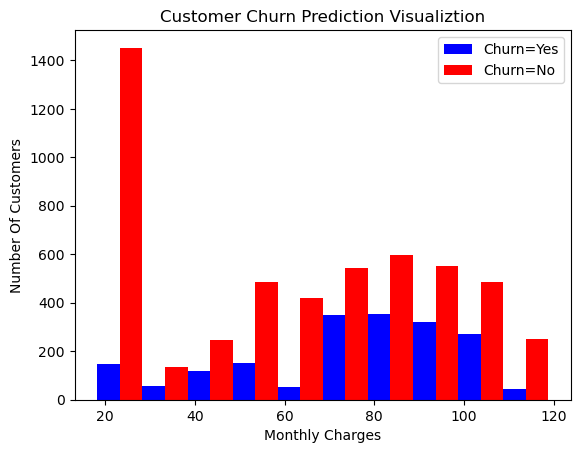

In [12]:
mc_churn_no = d1[d1.Churn=='No'].MonthlyCharges      
mc_churn_yes = d1[d1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth= 2.5, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [13]:
#Creating a class which prints all the unique values in the dataset

def object_unique_types(d1):
    for column in d1:
        print(f'{column} : {d1[column].unique()}')
    

In [14]:
#Calling the class created with the d1 dataset
object_unique_types(d1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [15]:
#We can observe that there are some columns with 'No Phone Service' and 'No Internet Service' which can be replaced with 'No'
d1.replace('No internet service', 'No', inplace= True)
d1.replace('No phone service', 'No', inplace= True)

C:\Users\saich\AppData\Local\Temp\ipykernel_21104\3287109686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.replace('No internet service', 'No', inplace= True)
C:\Users\saich\AppData\Local\Temp\ipykernel_21104\3287109686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.replace('No phone service', 'No', inplace= True)


In [16]:
object_unique_types(d1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [17]:
#Now replace the 'Yes' and 'No' with '1' and '0'
d1.replace('Yes', '1', inplace= True)
d1.replace('No', '0', inplace= True)


C:\Users\saich\AppData\Local\Temp\ipykernel_21104\3158727459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.replace('Yes', '1', inplace= True)
C:\Users\saich\AppData\Local\Temp\ipykernel_21104\3158727459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.replace('No', '0', inplace= True)


In [18]:
d1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\saich\AppData\Local\Temp\ipykernel_21104\1131856124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [19]:
object_unique_types(d1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : ['1' '0']
Dependents : ['0' '1']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
InternetService : ['DSL' 'Fiber optic' '0']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
DeviceProtection : ['0' '1']
TechSupport : ['0' '1']
StreamingTV : ['0' '1']
StreamingMovies : ['0' '1']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['1' '0']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['0' '1']


In [20]:
d1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [21]:
#There are some columns with different unique values. To solve this we use one-hot encoding
d2 = pd.get_dummies(data=d1, columns=['InternetService','Contract','PaymentMethod'])
d2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
# After some data cleaning, now we can use scalar functn to reduce the values to [0, 1] in the each column to make easy machine learning

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d2[cols_to_scale] = scaler.fit_transform(d2[cols_to_scale])

In [23]:
d2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False


In [24]:
object_unique_types(d2)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : ['1' '0']
Dependents : ['0' '1']
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : ['0' '1']
MultipleLines : ['0' '1']
OnlineSecurity : ['0' '1']
OnlineBackup : ['1' '0']
Devic

In [25]:
#Creating X, y in the dataframe. Dividing the dataset into train and test. 
X = d2.drop('Churn',axis='columns')
y = d2[['Churn']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [26]:
type(X)

pandas.core.frame.DataFrame

(5625, 1)

In [27]:
#Converting the train data into float
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

### Identifying the imbalance in the dataset

In [29]:
d2= d2.astype('float32')

In [30]:
# Class count in churn column
count_0, count_1 = d2.Churn.value_counts()

# Divide by class
class_0 = d2[d2['Churn'] == 0]
class_1 = d2[d2['Churn'] == 1]

In [31]:
# Printing the shape of the data with churn= 0, churn= 1
# We can oberve imbalance in the dataset target column. To equalize the number of rows, we are going to do SMOTE technique
print(class_0.shape)
print(class_1.shape)

(5163, 27)
(1869, 27)


### Using SMOTE for balancing churn '0' and churn '1'

In [32]:
#Initializing X, y for SMOTE
X = d2.drop('Churn',axis='columns')
y = d2[['Churn']]

In [33]:
type(y)

pandas.core.frame.DataFrame

In [36]:
# 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0.0      5163
1.0      5163
Name: count, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5)

### Creating ANN Algorithm using tensorflow

In [40]:
# Creating tensorflow pipeline with different layers.
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5392 - accuracy: 0.7351
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4714 - accuracy: 0.7765
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4629 - accuracy: 0.7804
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.7833
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4536 - accuracy: 0.7870
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4477 - accuracy: 0.7874
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4458 - accuracy: 0.7868
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.7892
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.7924
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4345 - accura

In [41]:
prediction=model.predict(X_test)

65/65 [==============================] - 0s 4ms/step


In [48]:
y_test.head()

,Churn
9238,1.0
6020,0.0
8112,1.0
2049,1.0
6185,0.0


In [50]:
#We can observe that the first five values are correctly predicted using ANN
prediction[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
prediction = np.round(prediction)
    
print("Classification Report: \n", classification_report(y_test, prediction))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      1025
         1.0       0.79      0.81      0.80      1041

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

